In [3]:
# from google.colab import drive
# import sys

# # Mount Google Drive
# drive.mount('/content/drive')

# # Get the absolute path of the current folder
# abspath_curr = '/content/drive/My Drive/Colab Notebooks/'


In [104]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import seaborn as sns
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.multivariate.pca import PCA
import rasterio
from rasterio.plot import show
from scipy.stats import spearmanr, pearsonr
import rasterio.mask
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon
from pyquadkey2 import quadkey

In [6]:
Hies_data = pd.read_stata('/Users/kismatkhatri/Documents/Capstone project/310_HIES201819_Rescaledbyhhsize_24618obs.dta')

In [7]:
# Hies_data.shape # (24618, 393)
Hies_data['popwt_f']


0        3796.364746
1        4881.040527
2        3254.026855
3        3254.026855
4        2711.689209
            ...     
24613    5317.686035
24614    3988.264648
24615    5317.686035
24616    3988.264648
24617    4652.975098
Name: popwt_f, Length: 24618, dtype: float32

In [8]:
# !pip install pyreadstat
# import pyreadstat

# # Assuming you have a Stata dataset file named 'your_data.dta'
# df, meta = pyreadstat.read_dta(abspath_curr + '/data/PSLM_HIES/310_HIES201819_Rescaledbyhhsize_24618obs.dta')

# # Access variable labels from the metadata
# variable_labels = meta.column_labels

# # Print variable labels
# for i, var_label in enumerate(variable_labels):
#     var_name = df.columns[i]
#     print(f"Variable: {var_name}, Label: {var_label}")

In [9]:
Pslm_data = pd.read_stata('/Users/kismatkhatri/Documents/Capstone project/310_PSLM201920_Rescaledbyhhsize_160654obs.dta')

In [10]:
Pslm_data['popwt_f']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
160649   NaN
160650   NaN
160651   NaN
160652   NaN
160653   NaN
Name: popwt_f, Length: 160654, dtype: float32

In [11]:
# # Assuming you have a Stata dataset file named 'your_data.dta'
# df, meta = pyreadstat.read_dta(abspath_curr + '/data/PSLM_HIES/310_PSLM201920_Rescaledbyhhsize_160654obs.dta')

# # Access variable labels from the metadata
# variable_labels = meta.column_labels

# # Print variable labels
# for i, var_label in enumerate(variable_labels):
#     var_name = df.columns[i]
#     print(f"Variable: {var_name}, Label: {var_label}")

## Summary of PSLM and HIES


In [12]:
variables_list1 = [
    "W_dkw_inspiped",
    "W_dkw_inshandpump",
    "W_dkw_insmotorpump",
    "W_dkw_insclosedwell",
    "W_dkw_insopenwell",
    "W_dkw_insprotsprng",
    "W_dkw_insunprsprng",
    "W_dkw_outpiped",
    "W_dkw_outhandpump",
    "W_dkw_outmotorpump",
    "W_dkw_outclosedwell",
    "W_dkw_outopenwell",
    "W_dkw_outprotsprng",
    "W_dkw_outunprsprng",
    "W_dkw_pond",
    "W_dkw_bottwater",
    "W_dkw_tanker",
    "W_dkw_filtration",
    "W_dkw_other",
    "W_toilet_notoilet",
    "W_toilet_flushpub",
    "W_toilet_flushtank",
    "W_toilet_flushpit",
    "W_toilet_flushopen",
    "W_toilet_raiselat",
    "W_toilet_pitlat",
    "W_toilet_other",
    "W_toiletshared",
    "W_toiletprivate",
    "H_cooking_firewood",
    "H_cooking_gas",
    "H_cooking_lpg",
    "H_cooking_dung",
    "H_cooking_crop",
    "H_cooking_other",
    "H_floor_earth",
    "H_floor_ceramic",
    "H_floor_cement",
    "H_floor_bricks",
    "H_floor_other",
    "H_roof_rccrbc",
    "H_roof_wood",
    "H_roof_sheet",
    "H_roof_grader",
    "H_roof_other",
    "H_walls_burntbricks",
    "H_walls_mudbricks",
    "H_walls_wood",
    "H_walls_stones",
    "H_walls_other",
    "D_iradio",
    "D_itelevsion",
    "D_ilcdled",
    "D_irefrigerator",
    "D_ifreezer",
    "D_iwashing",
    "D_idryer",
    "D_iairconditioning",
    "D_iaircooler",
    "D_ifan",
    "D_istove",
    "D_icookingrange",
    "D_imicrowave",
    "D_isewingmachine",
    "D_iknitting",
    "D_iiron",
    "D_iwaterfilter",
    "D_idonkeypump",
    "D_iturbine",
    "D_ichair",
    "D_itable",
    "D_iups",
    "D_igenerator",
    "D_isolarpanel",
    "D_iheater",
    "D_igeaser",
    "D_ibicycle",
    "D_imotorcyclescotter",
    "D_irichshaw",
    "D_icar",
    "D_ivantruckbus",
    "D_iboat",
    "D_itractortralloy",
    "D_iclock"
]

# Assuming 'weights' is the column in your DataFrame that contains the survey weights
weights_pslm = Pslm_data['popwt']
weights_hies = Hies_data['popwt_f']

selected_variables_pslm = Pslm_data[variables_list1]
selected_variables_hies = Hies_data[variables_list1]

# Calculate weighted means and standard deviations for PSLM data
weighted_means_pslm = np.average(selected_variables_pslm, weights=weights_pslm, axis=0)
weighted_std_pslm = np.sqrt(np.average((selected_variables_pslm - weighted_means_pslm)**2, weights=weights_pslm, axis=0))

# Calculate weighted means and standard deviations for HIES data
weighted_means_hies = np.average(selected_variables_hies, weights=weights_hies, axis=0)
weighted_std_hies = np.sqrt(np.average((selected_variables_hies - weighted_means_hies)**2, weights=weights_hies, axis=0))

# Count the number of missing values for each variable
missing_values_pslm = selected_variables_pslm.isna().sum()
missing_values_hies = selected_variables_hies.isna().sum()

# Create a summary DataFrame
Summary_data = pd.DataFrame({
    'Weighted Mean PSLM': weighted_means_pslm,
    'Weighted Std PSLM': weighted_std_pslm,
    'Missing Values PSLM': missing_values_pslm,
    'Weighted Mean HIES': weighted_means_hies,
    'Weighted Std HIES': weighted_std_hies,
    'Missing Values HIES': missing_values_hies
}, index=variables_list1)

print(Summary_data)

                     Weighted Mean PSLM  Weighted Std PSLM  \
W_dkw_inspiped                 0.188993           0.391503   
W_dkw_inshandpump              0.179021           0.383370   
W_dkw_insmotorpump             0.277011           0.447522   
W_dkw_insclosedwell            0.012176           0.109670   
W_dkw_insopenwell              0.006802           0.082194   
...                                 ...                ...   
D_icar                         0.062710           0.242440   
D_ivantruckbus                 0.009387           0.096431   
D_iboat                        0.000640           0.025297   
D_itractortralloy              0.027484           0.163488   
D_iclock                       0.609786           0.487798   

                     Missing Values PSLM  Weighted Mean HIES  \
W_dkw_inspiped                         0            0.172982   
W_dkw_inshandpump                      0            0.181647   
W_dkw_insmotorpump                     0            0.296236   

## PCA for PSLM

In [13]:
# from statsmodels.multivariate.pca import PCA
# #from statsmodels.multivariate.pca import SurveyPCA

# selected_variables = Pslm_data[variables_list1].copy()


# # Drop rows with missing values and reset the index to align with the weights
# selected_variables.dropna(inplace=True)
# selected_variables.reset_index(drop=True, inplace=True)

# # Perform Min-Max scaling
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(selected_variables)

# # # Ensure the weights are aligned with the scaled data
# # weights = Pslm_data.loc[selected_variables.index, 'popwt'].values
# # sqrt_weights = np.sqrt(weights)

# # # Adjust data using the square root of weights
# # # This step is crucial since weights in PCA are usually applied to rows, not columns
# # weighted_data = scaled_data * sqrt_weights[:, np.newaxis]

# # Initialize the PCA object without specifying weights
# # since we have already adjusted the data with weights

# pca_model = PCA(scaled_data , weights= Pslm_data['popwt'], ncomp=1, standardize=False, demean=False)
# # pca_model = PCA(scaled_data , weights= Pslm_data['popwt'], ncomp=1, standardize=False, demean=False)

# # Fit the PCA model
# pca_model.fit()

# # Extract the components and loadings
# components = pca_model.factors
# loadings = pca_model.loadings

# # Analyze the PCA output
# # Print the explained variance
# explained_variance = pca_model.rsquare[0] if pca_model.rsquare.size > 0 else 0
# print(f'PCA variance explained: {explained_variance * 100:.2f}%')

# # Create the basis vector DataFrame
# basis_vector = pd.DataFrame(loadings, index=variables_list1)

# # Sort the basis vector by magnitude in descending order
# basis_vector.sort_values(by=0, ascending=False, inplace=True)

# # Save the basis vector to a CSV file
# basis_vector.to_csv('basis_vector.csv')

# # Add the wealth index as a new column in your DataFrame
# Pslm_data['Wealth_Index'] = components.squeeze()

# # Save the updated DataFrame with the wealth index to a new CSV file
# Pslm_data.to_csv('data_with_wealth_index.csv', index=False)


In [14]:
#from google.colab import files

#files.download('PSLM_data_with_wealth_index.csv')


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Assuming Pslm_data and variables_list1 are defined and imported correctly.

# Step 1: Extract the selected columns and drop rows with missing values
selected_variables = Pslm_data[variables_list1].dropna().reset_index(drop=True)

# Step 2: Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_variables)

# Step 3: Calculate the square root of weights and adjust the scaled data
weights = Pslm_data.loc[selected_variables.index, 'popwt']
sqrt_weights = np.sqrt(weights)

# This ensures that the weights are applied to each observation
weighted_data = scaled_data * sqrt_weights[:, None]  # Using None instead of np.newaxis to avoid the warning

# Step 4: Apply PCA on the weighted data
pca = PCA(n_components=1)
pca.fit(weighted_data)

# Multiply the PCA components by the square root of the eigenvalues if necessary
components = pca.transform(weighted_data) * np.sqrt(pca.explained_variance_)

# Step 5: Analyze the PCA output
explained_variance = pca.explained_variance_ratio_[0]
print(f'PCA variance explained: {explained_variance * 100:.2f}%')

# Create the basis vector DataFrame
basis_vector = pd.DataFrame(pca.components_.T, index=variables_list1, columns=['Magnitude'])

# Sort the basis vector by magnitude in descending order
basis_vector.sort_values(by='Magnitude', ascending=False, inplace=True)

# Normalize the wealth index if necessary to match the expected range
wealth_index = components.squeeze()
min_max_scaler = MinMaxScaler(feature_range=(-2, 2))
Pslm_data['Wealth_Index1'] = min_max_scaler.fit_transform(wealth_index.reshape(-1, 1))

# Save the basis vector and updated DataFrame to CSV files
basis_vector.to_csv('PSLM_DATA_with_basis_vector.csv')
Pslm_data.to_csv('PSLM_data_with_wealth_index.csv', index=False)


/var/folders/zg/n2c3c7jj1t5dv6zbxjqxzbnc0000gn/T/ipykernel_7334/3052149695.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  weighted_data = scaled_data * sqrt_weights[:, None]  # Using None instead of np.newaxis to avoid the warning


PCA variance explained: 25.60%


In [16]:
Pslm_data['Wealth_Index1']

0        -1.375055
1        -1.567844
2        -1.694693
3        -1.365148
4        -1.391423
            ...   
160649   -1.550367
160650   -1.408643
160651   -1.779701
160652   -1.728680
160653   -1.821425
Name: Wealth_Index1, Length: 160654, dtype: float64

In [17]:
# Step 1: Extract the selected columns and drop rows with missing values
selected_variables = Hies_data[variables_list1].dropna().reset_index(drop=True)

# Step 2: Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_variables)

# Step 3: Calculate the square root of weights and adjust the scaled data
weights = Hies_data.loc[selected_variables.index, 'popwt']
sqrt_weights = np.sqrt(weights)

# This ensures that the weights are applied to each observation
weighted_data = scaled_data * sqrt_weights[:, np.newaxis]

# Step 4: Apply PCA on the weighted data
pca = PCA(n_components=1)
pca.fit(weighted_data)

# Multiply the PCA components by the square root of the eigenvalues if necessary
components = pca.transform(weighted_data) * np.sqrt(pca.explained_variance_)

# Step 5: Analyze the PCA output
explained_variance = pca.explained_variance_ratio_[0]
print(f'PCA variance explained: {explained_variance * 100:.2f}%')

# Create the basis vector DataFrame
basis_vector = pd.DataFrame(pca.components_.T, index=variables_list1, columns=['Magnitude'])

# Sort the basis vector by magnitude in descending order
basis_vector.sort_values(by='Magnitude', ascending=False, inplace=True)

# Normalize the wealth index if necessary to match the expected range
wealth_index = components.squeeze()
min_max_scaler = MinMaxScaler(feature_range=(-2, 2))
Hies_data['Wealth_Index1'] = min_max_scaler.fit_transform(wealth_index.reshape(-1, 1))

# Save the basis vector and updated DataFrame to CSV files
basis_vector.to_csv('HIES_DATA_with_basis_vector.csv')
Hies_data.to_csv('HIES_data_with_wealth_index.csv', index=False)


/var/folders/zg/n2c3c7jj1t5dv6zbxjqxzbnc0000gn/T/ipykernel_7334/2226146111.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  weighted_data = scaled_data * sqrt_weights[:, np.newaxis]


PCA variance explained: 25.04%


In [18]:
Hies_data['Wealth_Index1']

0       -1.136745
1       -1.058097
2       -0.848573
3       -1.441907
4       -1.060915
           ...   
24613   -0.830041
24614   -0.892117
24615   -0.718182
24616   -0.811159
24617   -0.826415
Name: Wealth_Index1, Length: 24618, dtype: float64

## Distribution of a wealth index estimated in the HIES and PLSM

In [19]:
hies_data = pd.read_csv('PSLM_data_with_wealth_index.csv')
pslm_data = pd.read_csv('HIES_data_with_wealth_index.csv')


# Function to calculate distribution statistics of the wealth index
def calculate_distribution_statistics(data, wealth_index_column='Wealth_Index1', group_by_columns=None):
    if group_by_columns:
        grouped_data = data.groupby(group_by_columns)
        statistics = grouped_data[wealth_index_column].agg(['mean', 'std', 'median', 'quantile'])
    else:
        statistics = data[wealth_index_column].agg(['mean', 'std', 'median', 'quantile']).to_frame().transpose()
    return statistics

# Calculate distribution statistics for HIES dataset
hies_national_stats = calculate_distribution_statistics(hies_data)
hies_urban_rural_stats = calculate_distribution_statistics(hies_data, group_by_columns='rural')
hies_province_stats = calculate_distribution_statistics(hies_data, group_by_columns='Province')
hies_urban_rural_province_stats = calculate_distribution_statistics(hies_data, group_by_columns=['Province', 'rural'])

# Calculate distribution statistics for PSLM dataset
pslm_national_stats = calculate_distribution_statistics(pslm_data)
pslm_urban_rural_stats = calculate_distribution_statistics(pslm_data, group_by_columns='rural')
pslm_province_stats = calculate_distribution_statistics(pslm_data, group_by_columns='Province')
pslm_urban_rural_province_stats = calculate_distribution_statistics(pslm_data, group_by_columns=['Province', 'rural'])

# Display the results for HIES dataset
hies_national_stats, hies_urban_rural_stats, hies_province_stats, hies_urban_rural_province_stats


(                   mean       std    median  quantile
 Wealth_Index1 -1.389585  0.295194 -1.419269 -1.419269,
            mean       std    median  quantile
 rural                                        
 rural -1.479057  0.252353 -1.518331 -1.518331
 urban -1.191472  0.286542 -1.202114 -1.202114,
                  mean       std    median  quantile
 Province                                           
 Balochistan -1.608429  0.192254 -1.670535 -1.670535
 KP          -1.437228  0.263270 -1.484435 -1.484435
 Punjab      -1.304554  0.290779 -1.324698 -1.324698
 Sindh       -1.445510  0.294942 -1.473867 -1.473867,
                        mean       std    median  quantile
 Province    rural                                        
 Balochistan rural -1.650113  0.157079 -1.697392 -1.697392
             urban -1.424508  0.222933 -1.452200 -1.452200
 KP          rural -1.473636  0.233851 -1.513520 -1.513520
             urban -1.173384  0.309999 -1.201582 -1.201582
 Punjab      rural -1.38943

## Harmonizing wealth indices

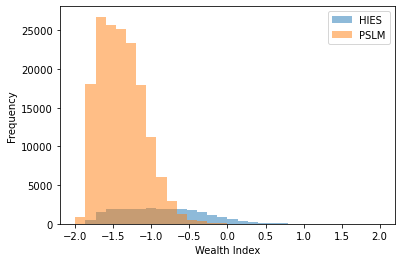

In [20]:
# Calculate descriptive statistics
mean_HIES = np.mean(Hies_data['Wealth_Index1'])
std_HIES = np.std(Hies_data['Wealth_Index1'])

mean_PSLM = np.mean(Pslm_data['Wealth_Index1'])
std_PSLM = np.std(Pslm_data['Wealth_Index1'])

# Visual inspection (histograms)
import matplotlib.pyplot as plt

plt.hist(Hies_data['Wealth_Index1'], bins=30, alpha=0.5, label='HIES')
plt.hist(Pslm_data['Wealth_Index1'], bins=30, alpha=0.5, label='PSLM')
plt.legend(loc='upper right')
plt.xlabel('Wealth Index')
plt.ylabel('Frequency')
plt.show()

# Assuming HIES_data and PSLM_data are pandas DataFrames
# Align the data to have the same length
min_length = min(len(Hies_data), len(Pslm_data))
HIES_data = Hies_data.iloc[:min_length]
PSLM_data = Pslm_data.iloc[:min_length]


In [21]:
import pandas as pd

# Load the PSLM and HIES data with wealth indices
pslm_data = pd.read_csv('PSLM_data_with_wealth_index.csv')
hies_data = pd.read_csv('HIES_data_with_wealth_index.csv')

# Add survey weights
pslm_data['weights'] = pslm_data['popwt']
hies_data['weights'] = hies_data['popwt_f']

# Calculate weighted means and standard deviations for wealth indices
weighted_mean_pslm = (pslm_data['Wealth_Index1'] * pslm_data['weights']).sum() / pslm_data['weights'].sum()
weighted_std_pslm = ((pslm_data['Wealth_Index1'] - weighted_mean_pslm)**2 * pslm_data['weights']).sum() / pslm_data['weights'].sum()

weighted_mean_hies = (hies_data['Wealth_Index1'] * hies_data['weights']).sum() / hies_data['weights'].sum()
weighted_std_hies = ((hies_data['Wealth_Index1'] - weighted_mean_hies)**2 * hies_data['weights']).sum() / hies_data['weights'].sum()

# Standardize wealth indices within each dataset
pslm_data['Wealth_Index_PSLM_Standardized'] = (pslm_data['Wealth_Index1'] - weighted_mean_pslm) / weighted_std_pslm
hies_data['Wealth_Index_HIES_Standardized'] = (hies_data['Wealth_Index1'] - weighted_mean_hies) / weighted_std_hies

# Calculate weighted average for harmonized wealth index
total_weights = pslm_data['weights'].sum() + hies_data['weights'].sum()
harmonized_wealth_index_pslm = (pslm_data['Wealth_Index_PSLM_Standardized'] * pslm_data['weights']) / total_weights
harmonized_wealth_index_hies = (hies_data['Wealth_Index_HIES_Standardized'] * hies_data['weights']) / total_weights

# Add the harmonized wealth index to both datasets
pslm_data['Harmonized_Wealth_Index1'] = harmonized_wealth_index_pslm
hies_data['Harmonized_Wealth_Index1'] = harmonized_wealth_index_hies

# Save the updated datasets with harmonized wealth indices
pslm_data.to_csv('PSLM_data_with_harmonized_wealth_index.csv', index=False)
hies_data.to_csv('HIES_data_with_harmonized_wealth_index.csv', index=False)



In [22]:
hies_data['Harmonized_Wealth_Index1']

0       -0.000010
1       -0.000011
2       -0.000003
3       -0.000015
4       -0.000006
           ...   
24613   -0.000005
24614   -0.000005
24615   -0.000001
24616   -0.000003
24617   -0.000004
Name: Harmonized_Wealth_Index1, Length: 24618, dtype: float64

## Household wealth correlates with household expenditure in HIES Data

In [23]:
from scipy.stats import spearmanr

# Load the HIES data with the wealth index
hies_data = pd.read_csv('HIES_data_with_wealth_index.csv')

# Aggregate the data at the province level
province_agg = hies_data.groupby('Province').agg({'Wealth_Index1': 'mean', 'lnexpM': 'mean'}).reset_index()

# Calculate the Spearman rank correlation
correlation, p_value = spearmanr(province_agg['Wealth_Index1'], province_agg['lnexpM'])

# Print the results
print(f"Spearman Rank Correlation at Province Level: {correlation:.2f}")
print(f"P-Value: {p_value:.4f}")

Spearman Rank Correlation at Province Level: 0.80
P-Value: 0.2000


## Comparing the RWI with the wealth index from the PSLM data

In [24]:
# Load the RWI data from the CSV file
rwi_data = pd.read_csv("/Users/kismatkhatri/Documents/Capstone project/RWI.csv")

In [25]:
import geopandas as gpd
from fiona import Env

with Env(SHAPE_RESTORE_SHX='YES'):
    districts = gpd.read_file('/Users/kismatkhatri/Documents/Capstone project/shapefile/pak_admbnda_adm2_wfp_20220909.shp')
    print(districts.head())

   Shape_Leng  Shape_Area        ADM2_EN ADM2_PCODE ADM2_REF ADM2ALT1EN  \
0    1.594116    0.067758           Bagh      PK101     None       None   
1    1.987888    0.117047        Bhimber      PK102     None       None   
2    1.300416    0.066683  Jhelum Valley      PK103     None       None   
3    1.001545    0.053722         Haveli      PK104     None       None   
4    2.017824    0.155069          Kotli      PK105     None       None   

  ADM2ALT2EN       ADM1_EN ADM1_PCODE   ADM0_EN ADM0_PCODE        date  \
0       None  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   
1       None  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   
2       None  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   
3       None  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   
4       None  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   

      validOn validTo                                           geometry  
0  2022-09-09    None  POLYGO

In [26]:
geometry = [Point(xy) for xy in zip(rwi_data['longitude'], rwi_data['latitude'])]
rwi_data = gpd.GeoDataFrame(rwi_data, geometry=geometry)

# Perform the spatial join to associate RWI data with districts
rwi_data_with_district = gpd.sjoin(rwi_data, districts, how="left", op="within")

/Users/kismatkhatri/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [27]:
# Filter the data to retain only the districts in Punjab, Sindh, Balochistan, KP, and Islamabad
provinces_to_include = ["Punjab", "Sindh", "Balochistan", "Khyber Pakhtunkhwa", "Islamabad"]
filtered_rwi_district_data = rwi_data_with_district[rwi_data_with_district['ADM1_EN'].isin(provinces_to_include)]

filtered_rwi_district_data.head()


,latitude,longitude,rwi,error,geometry,index_right,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo
0,33.897776,70.037842,-0.074,0.624,POINT (70.03784 33.89778),77.0,3.049083,0.330521,Kurram,PK518,None,None,None,Khyber Pakhtunkhwa,PK5,Pakistan,PK,2022-09-02,2022-09-09,None
1,31.118794,66.807861,-0.569,0.368,POINT (66.80786 31.11879),44.0,2.161751,0.154244,Chaman,PK235,None,None,None,Balochistan,PK2,Pakistan,PK,2022-09-02,2022-09-09,None
2,32.648625,73.245850,-0.193,0.498,POINT (73.24585 32.64863),107.0,4.149911,0.343704,Jhelum,PK613,None,None,None,Punjab,PK6,Pakistan,PK,2022-09-02,2022-09-09,None
3,35.182788,72.894287,-0.178,0.355,POINT (72.89429 35.18279),74.0,1.571019,0.081476,Kohistan Lower,PK515,None,None,None,Khyber Pakhtunkhwa,PK5,Pakistan,PK,2022-09-02,2022-09-09,None
4,25.948166,69.268799,-0.530,0.450,POINT (69.26880 25.94817),148.0,6.550566,0.915531,Sanghar,PK718,None,None,None,Sindh,PK7,Pakistan,PK,2022-09-02,2022-09-09,None


In [28]:
# Create a mapping dictionary for district names
district_mapping = {
    'Central Karachi': 'Karachi Central',
    'Chitral Lower': 'Chitral',
    'Chitral Upper': 'Chitral',
    'D. I. Khan': 'Dera Ismail Khan',
    'East Karachi': 'Karachi East',
    'Kashmore': 'Kashmor',
    'Kohistan Lower': 'Kohistan',
    'Kohistan Upper': 'Kohistan',
    'Korangi Karachi': 'Korangi',
    'Leiah': 'Layyah',
    'Malakand': 'Malakand Protected Area',
    'Malir Karachi': 'Malir',
    'Shaheed Benazir Abad': 'Shaheed Benazirabad',
    'South Karachi': 'Karachi South',
    'Tor Ghar': 'Torghar',
    'West Karachi': 'Karachi West',
    'Shaheed Sikandarabad': 'Surab'
}

# Apply the mapping dictionary to the 'ADM2_EN' column of the filtered_rwi_district_data dataframe
filtered_rwi_district_data['ADM2_EN'] = filtered_rwi_district_data['ADM2_EN'].replace(district_mapping)


/Users/kismatkhatri/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [29]:
district_mean_rwi = filtered_rwi_district_data.groupby('ADM2_EN')['rwi'].mean().reset_index()

# Sort the districts by RWI score in descending order
ranked_districts = district_mean_rwi.sort_values(by='rwi', ascending=False)

# Print the ranked districts
print(ranked_districts)


             ADM2_EN       rwi
43   Karachi Central  1.200615
63           Korangi  0.920591
44      Karachi East  0.893366
46      Karachi West  0.589120
33         Islamabad  0.545537
..               ...       ...
3              Badin -0.493108
116          Sujawal -0.498469
124       Tharparkar -0.511736
70             Lehri -0.532556
37        Jhal Magsi -0.586324

[134 rows x 2 columns]


In [30]:

pslm_data = pd.read_csv('PSLM_data_with_wealth_index.csv')
# Aggregating Wealth Index for PSLM
pslm_district_wealth = pslm_data.groupby('District')['Wealth_Index1'].mean().reset_index()

# Filter the RWI data to include only the common districts
common_districts = set(pslm_district_wealth['District'])
filtered_rwi_data = filtered_rwi_district_data[filtered_rwi_district_data['ADM2_EN'].isin(common_districts)]

# Aggregating RWI scores by district
rwi_district_wealth = filtered_rwi_data.groupby('ADM2_EN')['rwi'].mean()

# Ranking Districts based on wealth indices
pslm_district_ranking = pslm_district_wealth.sort_values(by='Wealth_Index1', ascending=False).reset_index(drop=True)
rwi_district_ranking = rwi_district_wealth.sort_values(ascending=False).reset_index()

# Save the rankings (optional)
pslm_district_ranking.to_csv('pslm_district_ranking.csv', index=False)
rwi_district_ranking.to_csv('rwi_district_ranking.csv', index=False)

# Calculate Spearman's rank correlation between PSLM and RWI rankings
corr_pslm_rwi, _ = spearmanr(pslm_district_ranking['Wealth_Index1'], rwi_district_ranking['rwi'])

print(f"Spearman's rank correlation between PSLM and RWI: {corr_pslm_rwi:.2f}")


Spearman's rank correlation between PSLM and RWI: 1.00


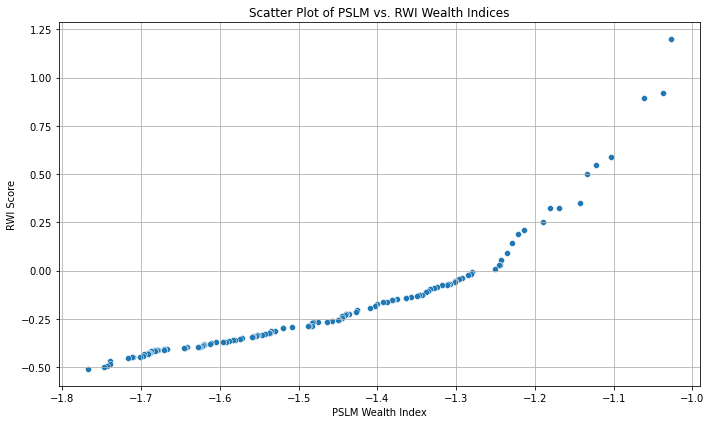

In [31]:
# 1. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pslm_district_ranking['Wealth_Index1'], y=rwi_district_ranking['rwi'])
plt.title("Scatter Plot of PSLM vs. RWI Wealth Indices")
plt.xlabel("PSLM Wealth Index")
plt.ylabel("RWI Score")
plt.grid(True)
plt.tight_layout()
plt.show()

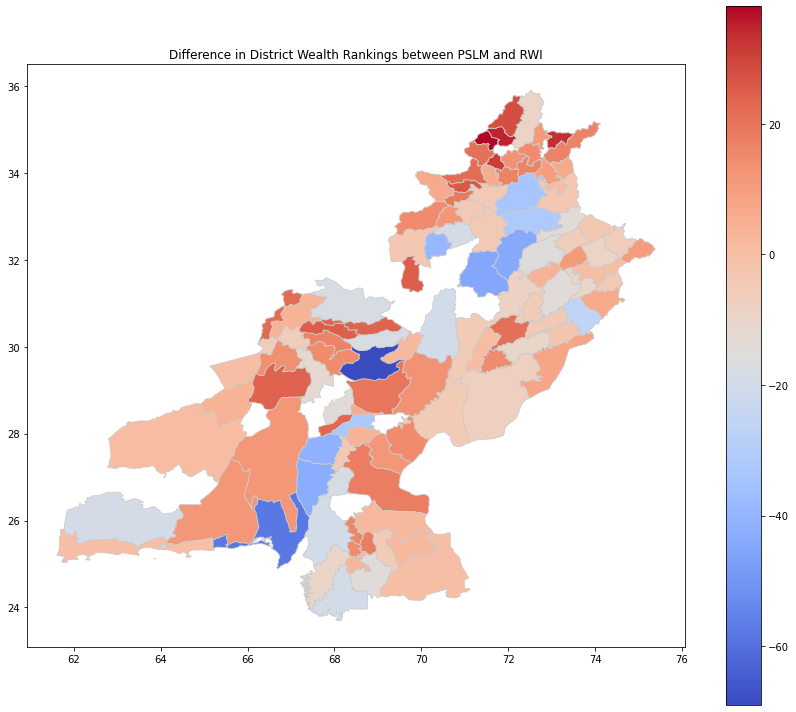

In [32]:
# 2. Heatmap (Difference between rankings)
# Assuming you have a shapefile 'districts_shapefile.shp' with district boundaries
gdf = gpd.read_file('/Users/kismatkhatri/Documents/Capstone project/shapefile/pak_admbnda_adm2_wfp_20220909.shp')

# Calculate the difference in rankings
pslm_district_ranking['PSLM Rank'] = pslm_district_ranking.index + 1
rwi_district_ranking['RWI Rank'] = rwi_district_ranking.index + 1
merged_rankings = pd.merge(pslm_district_ranking, rwi_district_ranking, left_on='District', right_on='ADM2_EN')
merged_rankings['Rank Difference'] = merged_rankings['PSLM Rank'] - merged_rankings['RWI Rank']

# Merge with the geodataframe
gdf = gdf.merge(merged_rankings, left_on='ADM2_EN', right_on='District', how='inner')

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='Rank Difference', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Difference in District Wealth Rankings between PSLM and RWI")
plt.tight_layout()
plt.show()

In [33]:
# Merge the two datasets on the district names
combined_data = pslm_district_ranking.merge(rwi_district_ranking, left_on='District', right_on='ADM2_EN')

n_bootstrap_samples = 1000
correlation_samples = []

for _ in range(n_bootstrap_samples):
    # Randomly sample districts with replacement
    sample = combined_data.sample(n=combined_data.shape[0], replace=True)

    # Calculate the correlation for this resampled data
    corr, _ = spearmanr(sample['Wealth_Index1'], sample['rwi'])
    correlation_samples.append(corr)

# Analyze bootstrap results
bootstrap_mean = np.mean(correlation_samples)
bootstrap_std = np.std(correlation_samples)
confidence_interval = np.percentile(correlation_samples, [2.5, 97.5])

print(f"Bootstrap Mean Correlation: {bootstrap_mean:.2f}")
print(f"Bootstrap Standard Deviation: {bootstrap_std:.2f}")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")


Bootstrap Mean Correlation: 0.81
Bootstrap Standard Deviation: 0.04
95% Confidence Interval: (0.73, 0.89)


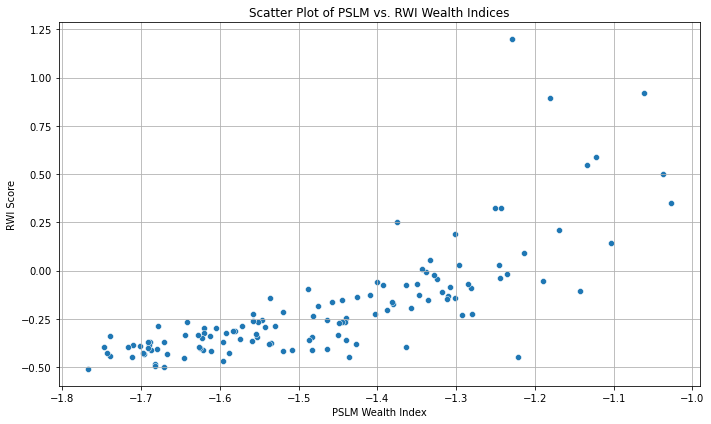

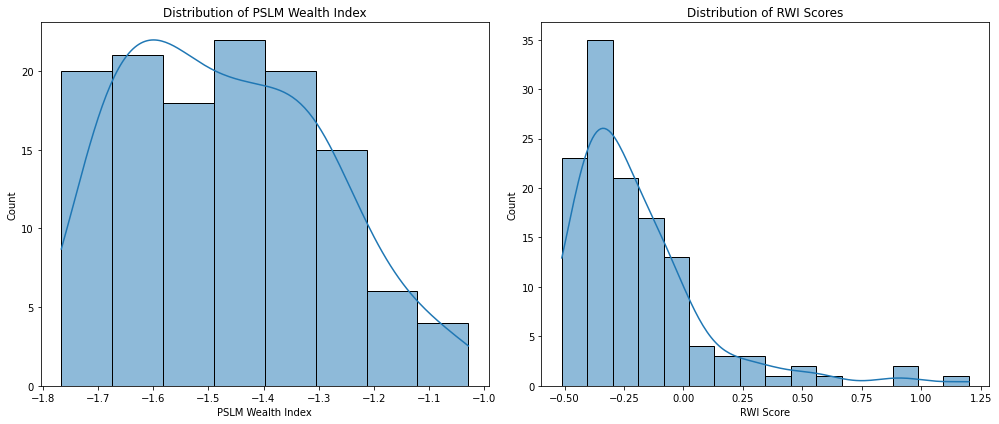

In [34]:

# Scatter plot of RWI vs PSLM scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data['Wealth_Index1'], y=combined_data['rwi'])
plt.title("Scatter Plot of PSLM vs. RWI Wealth Indices")
plt.xlabel("PSLM Wealth Index")
plt.ylabel("RWI Score")
plt.grid(True)
plt.tight_layout()
plt.show()



# Histograms
plt.figure(figsize=(14, 6))

# PSLM histogram
plt.subplot(1, 2, 1)
sns.histplot(combined_data['Wealth_Index1'], kde=True)
plt.title('Distribution of PSLM Wealth Index')
plt.xlabel('PSLM Wealth Index')
plt.ylabel('Count')

# RWI histogram
plt.subplot(1, 2, 2)
sns.histplot(combined_data['rwi'], kde=True)
plt.title('Distribution of RWI Scores')
plt.xlabel('RWI Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()







## Comparing the RWI with the  Harmonized Wealth index from the PSLM data

In [35]:
pslm_data1 = pd.read_csv('PSLM_data_with_harmonized_wealth_index.csv')
# Aggregating Wealth Index for PSLM
pslm_district_wealth1 = pslm_data1.groupby('District')['Harmonized_Wealth_Index1'].mean().reset_index()

# Filter the RWI data to include only the common districts
common_districts1 = set(pslm_district_wealth1['District'])
filtered_rwi_data1 = filtered_rwi_district_data[filtered_rwi_district_data['ADM2_EN'].isin(common_districts)]

# Aggregating RWI scores by district
rwi_district_wealth1 = filtered_rwi_data1.groupby('ADM2_EN')['rwi'].mean()

# Ranking Districts based on wealth indices
pslm_district_ranking1 = pslm_district_wealth1.sort_values(by='Harmonized_Wealth_Index1', ascending=False).reset_index(drop=True)
rwi_district_ranking1 = rwi_district_wealth1.sort_values(ascending=False).reset_index()

# Save the rankings (optional)
pslm_district_ranking1.to_csv('pslm_district_ranking_with_HarmonizedWealthIndex.csv', index=False)
rwi_district_ranking1.to_csv('rwi_district_ranking_with_rwi.csv', index=False)

# Calculate Spearman's rank correlation between PSLM and RWI rankings
corr_pslm_rwi, _ = spearmanr(pslm_district_ranking1['Harmonized_Wealth_Index1'], rwi_district_ranking1['rwi'])

print(f"Spearman's rank correlation between PSLM and RWI: {corr_pslm_rwi:.2f}")

Spearman's rank correlation between PSLM and RWI: 1.00


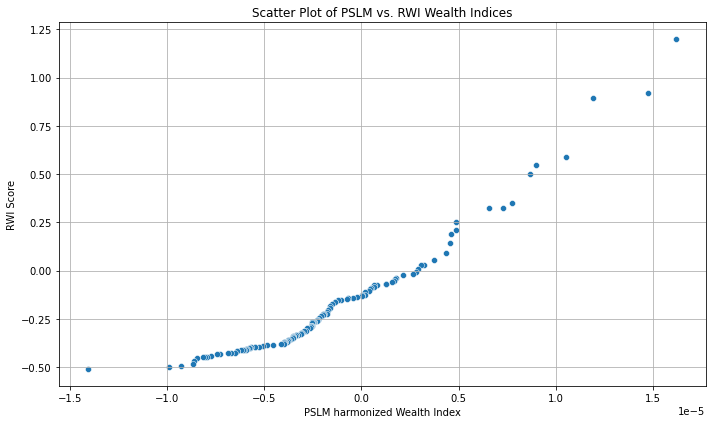

In [36]:
# 1. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pslm_district_ranking1['Harmonized_Wealth_Index1'], y=rwi_district_ranking1['rwi'])
plt.title("Scatter Plot of PSLM vs. RWI Wealth Indices")
plt.xlabel("PSLM harmonized Wealth Index")
plt.ylabel("RWI Score")
plt.grid(True)
plt.tight_layout()
plt.show()

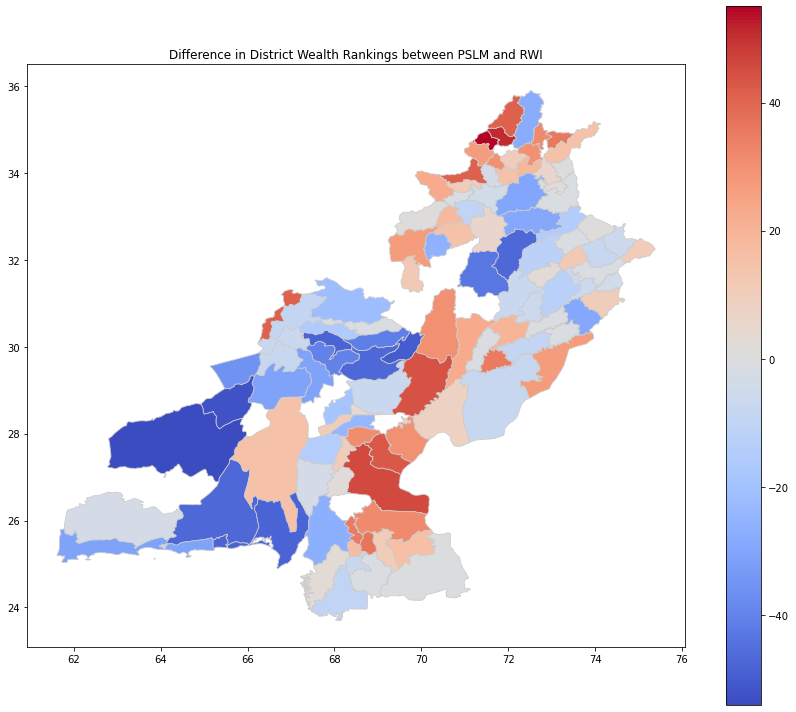

In [37]:
# 2. Heatmap (Difference between rankings)
# Assuming you have a shapefile 'districts_shapefile.shp' with district boundaries
gdf = gpd.read_file('/Users/kismatkhatri/Documents/Capstone project/shapefile/pak_admbnda_adm2_wfp_20220909.shp')

# Calculate the difference in rankings
pslm_district_ranking1['PSLM Rank'] = pslm_district_ranking1.index + 1
rwi_district_ranking1['RWI Rank'] = rwi_district_ranking1.index + 1
merged_rankings1 = pd.merge(pslm_district_ranking1, rwi_district_ranking1, left_on='District', right_on='ADM2_EN')
merged_rankings1['Rank Difference'] = merged_rankings1['PSLM Rank'] - merged_rankings1['RWI Rank']

# Merge with the geodataframe
gdf = gdf.merge(merged_rankings1, left_on='ADM2_EN', right_on='District', how='inner')

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='Rank Difference', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Difference in District Wealth Rankings between PSLM and RWI")
plt.tight_layout()
plt.show()

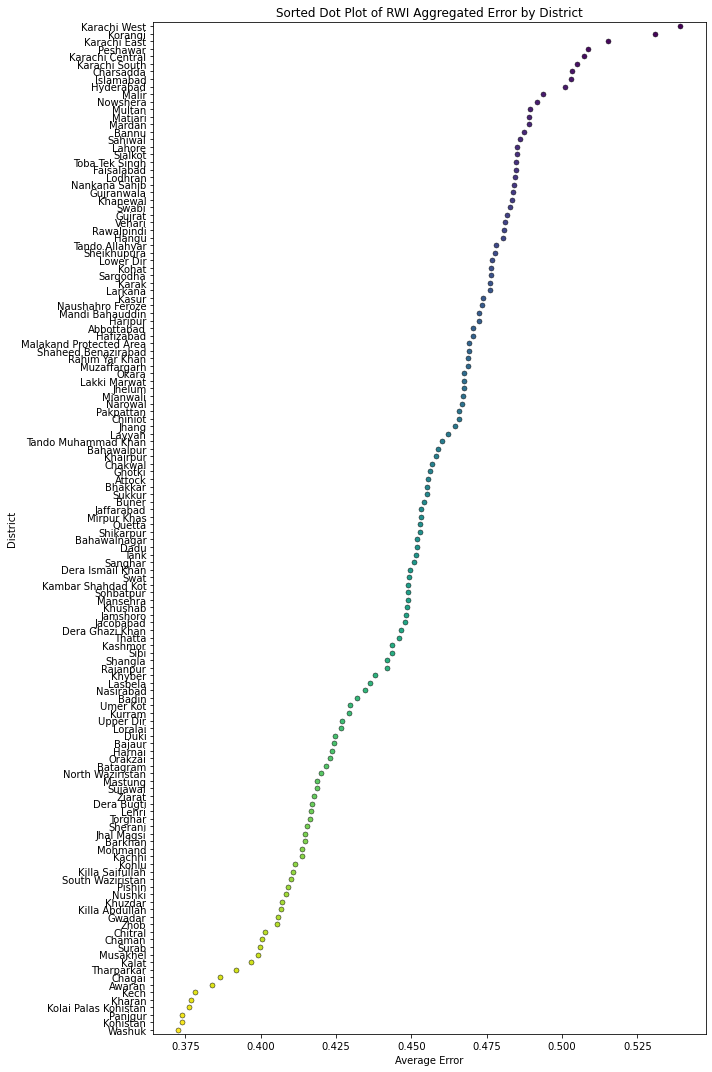

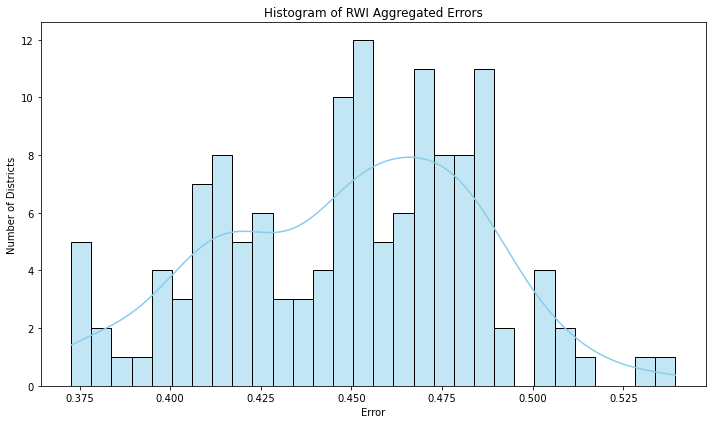

In [38]:
# Aggregate the error
agg_error = filtered_rwi_district_data.groupby('ADM2_EN')['error'].mean().reset_index().sort_values(by='error', ascending=False)

# Sorted Dot Plot
plt.figure(figsize=(10, 15))
sns.stripplot(data=agg_error, y='ADM2_EN', x='error', size=5, palette='viridis', jitter=False, linewidth=0.5)
plt.title('Sorted Dot Plot of RWI Aggregated Error by District')
plt.xlabel('Average Error')
plt.ylabel('District')
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(agg_error['error'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of RWI Aggregated Errors')
plt.xlabel('Error')
plt.ylabel('Number of Districts')
plt.tight_layout()
plt.show()


In [39]:
# Merge the two datasets on the district names
combined_data1 = pslm_district_ranking1.merge(rwi_district_ranking1, left_on='District', right_on='ADM2_EN')

n_bootstrap_samples = 1000
correlation_samples1 = []

for _ in range(n_bootstrap_samples):
    # Randomly sample districts with replacement
    sample1 = combined_data1.sample(n=combined_data1.shape[0], replace=True)

    # Calculate the correlation for this resampled data
    corr1, _ = spearmanr(sample1['Harmonized_Wealth_Index1'], sample1['rwi'])
    correlation_samples1.append(corr1)

# Analyze bootstrap results
bootstrap_mean1 = np.mean(correlation_samples1)
bootstrap_std1 = np.std(correlation_samples1)
confidence_interval1 = np.percentile(correlation_samples1, [2.5, 97.5])

print(f"Bootstrap Mean Correlation: {bootstrap_mean1:.2f}")
print(f"Bootstrap Standard Deviation: {bootstrap_std1:.2f}")
print(f"95% Confidence Interval: ({confidence_interval1[0]:.2f}, {confidence_interval1[1]:.2f})")


Bootstrap Mean Correlation: 0.73
Bootstrap Standard Deviation: 0.05
95% Confidence Interval: (0.62, 0.82)


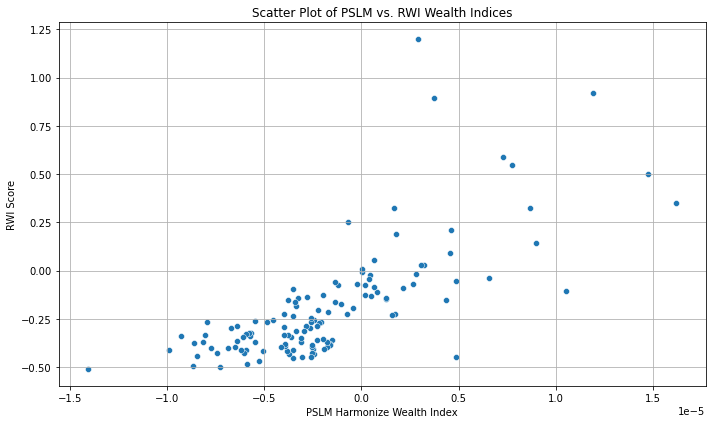

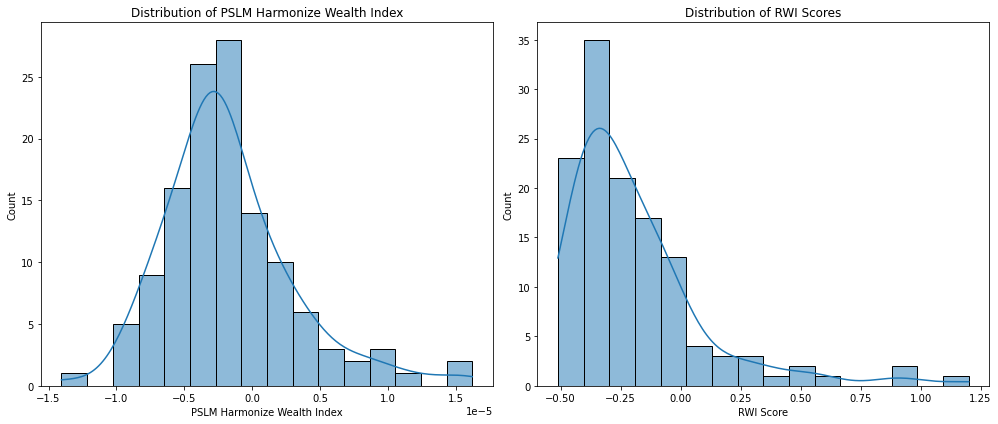

In [40]:

# Scatter plot of RWI vs PSLM scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data1['Harmonized_Wealth_Index1'], y=combined_data1['rwi'])
plt.title("Scatter Plot of PSLM vs. RWI Wealth Indices")
plt.xlabel("PSLM Harmonize Wealth Index")
plt.ylabel("RWI Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(14, 6))

# PSLM histogram
plt.subplot(1, 2, 1)
sns.histplot(combined_data1['Harmonized_Wealth_Index1'], kde=True)
plt.title('Distribution of PSLM Harmonize Wealth Index')
plt.xlabel('PSLM Harmonize Wealth Index')
plt.ylabel('Count')

# RWI histogram
plt.subplot(1, 2, 2)
sns.histplot(combined_data['rwi'], kde=True)
plt.title('Distribution of RWI Scores')
plt.xlabel('RWI Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


## TASK 4: Leverage the higher resolution of the RWI: To what extent can be used for targeting of social programs?

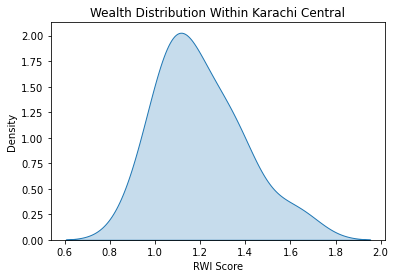

In [41]:
# 1. Wealth Distribution Within a Sample District (e.g., 'Karachi Central')
sample_district_data = filtered_rwi_district_data[filtered_rwi_district_data['ADM2_EN'] == 'Karachi Central']
sns.kdeplot(sample_district_data['rwi'], shade=True)
plt.title('Wealth Distribution Within Karachi Central')
plt.xlabel('RWI Score')
plt.show()


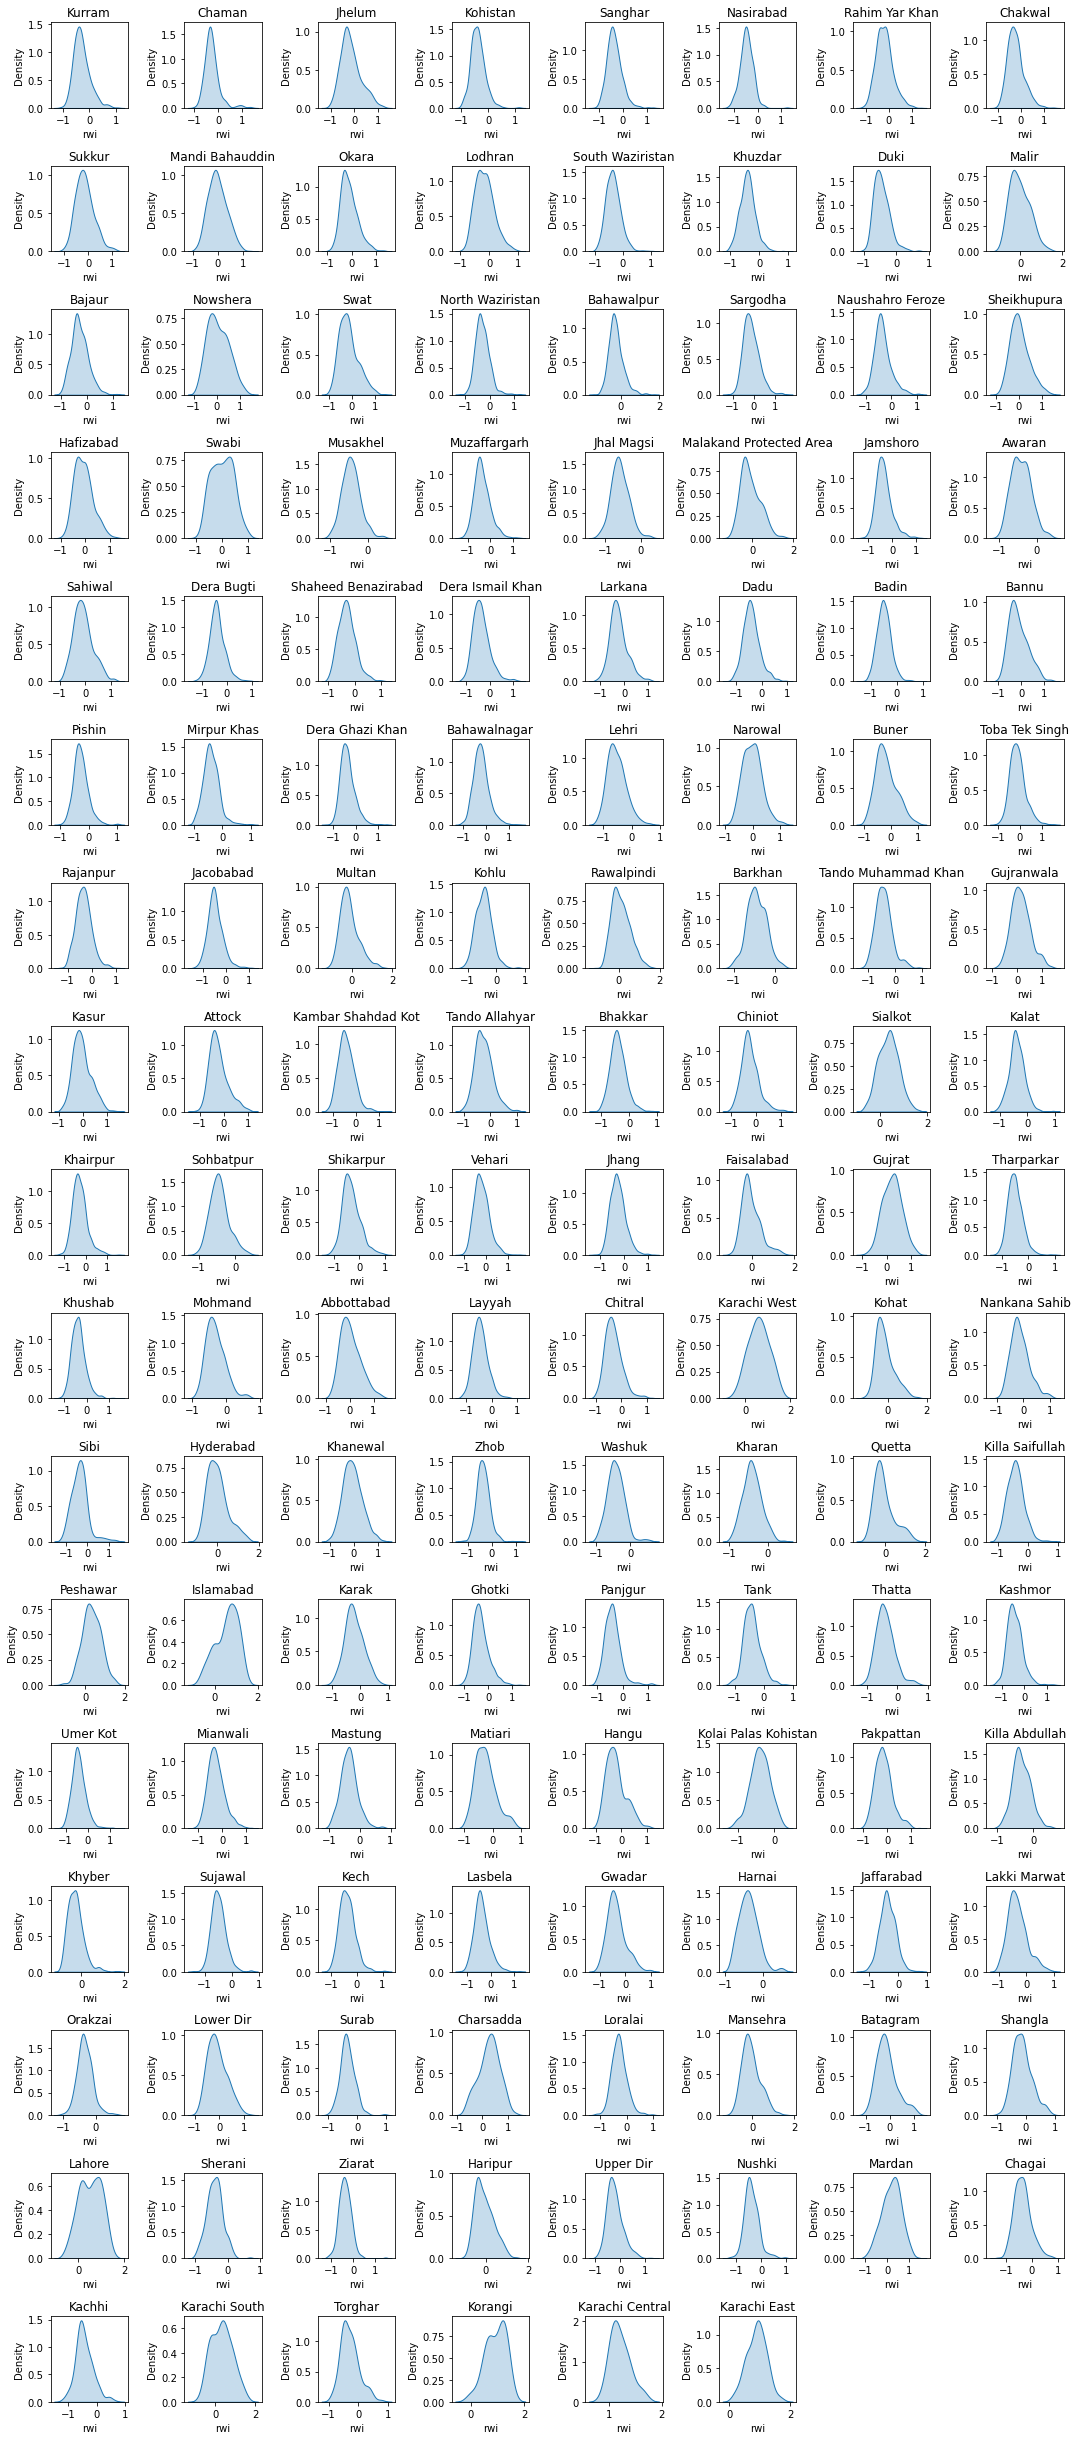

In [42]:
import math

num_districts_rwi = filtered_rwi_district_data['ADM2_EN'].nunique()

# Set subplot dimensions for RWI
num_cols_rwi = 8
num_rows_rwi = math.ceil(num_districts_rwi / num_cols_rwi)

plt.figure(figsize=(15, num_rows_rwi * 2))

for idx, district in enumerate(filtered_rwi_district_data['ADM2_EN'].unique()):
    plt.subplot(num_rows_rwi, num_cols_rwi, idx+1)
    district_data = filtered_rwi_district_data[filtered_rwi_district_data['ADM2_EN'] == district]
    sns.kdeplot(district_data['rwi'], fill=True)
    plt.title(district)
    plt.tight_layout()
    #plt.savefig(abspath_curr + '/data/plot.png')
plt.show()




In [43]:
rw_percentiles = filtered_rwi_district_data.groupby('ADM2_EN')['rwi'].quantile(0.10).reset_index()
rw_percentiles.rename(columns={'rwi': 'RWI_10th_Percentile'}, inplace=True)


In [44]:
pslm_percentiles = pslm_district_wealth.groupby('District')['Wealth_Index1'].quantile(0.10).reset_index()
pslm_percentiles.rename(columns={'Wealth_Index1': 'PSLM_10th_Percentile'}, inplace=True)


In [45]:
merged_percentiles = rw_percentiles.merge(pslm_percentiles, left_on='ADM2_EN', right_on='District', how='inner')
print(merged_percentiles)


          ADM2_EN  RWI_10th_Percentile      District  PSLM_10th_Percentile
0      Abbottabad              -0.4460    Abbottabad             -1.296573
1          Attock              -0.6511        Attock             -1.279513
2          Awaran              -0.7675        Awaran             -1.742824
3           Badin              -0.8270         Badin             -1.682946
4    Bahawalnagar              -0.6389  Bahawalnagar             -1.481182
..            ...                  ...           ...                   ...
121      Umer Kot              -0.7870      Umer Kot             -1.686918
122     Upper Dir              -0.5800     Upper Dir             -1.558077
123        Vehari              -0.6033        Vehari             -1.357235
124        Washuk              -0.7284        Washuk             -1.696828
125        Ziarat              -0.6946        Ziarat             -1.691330

[126 rows x 4 columns]


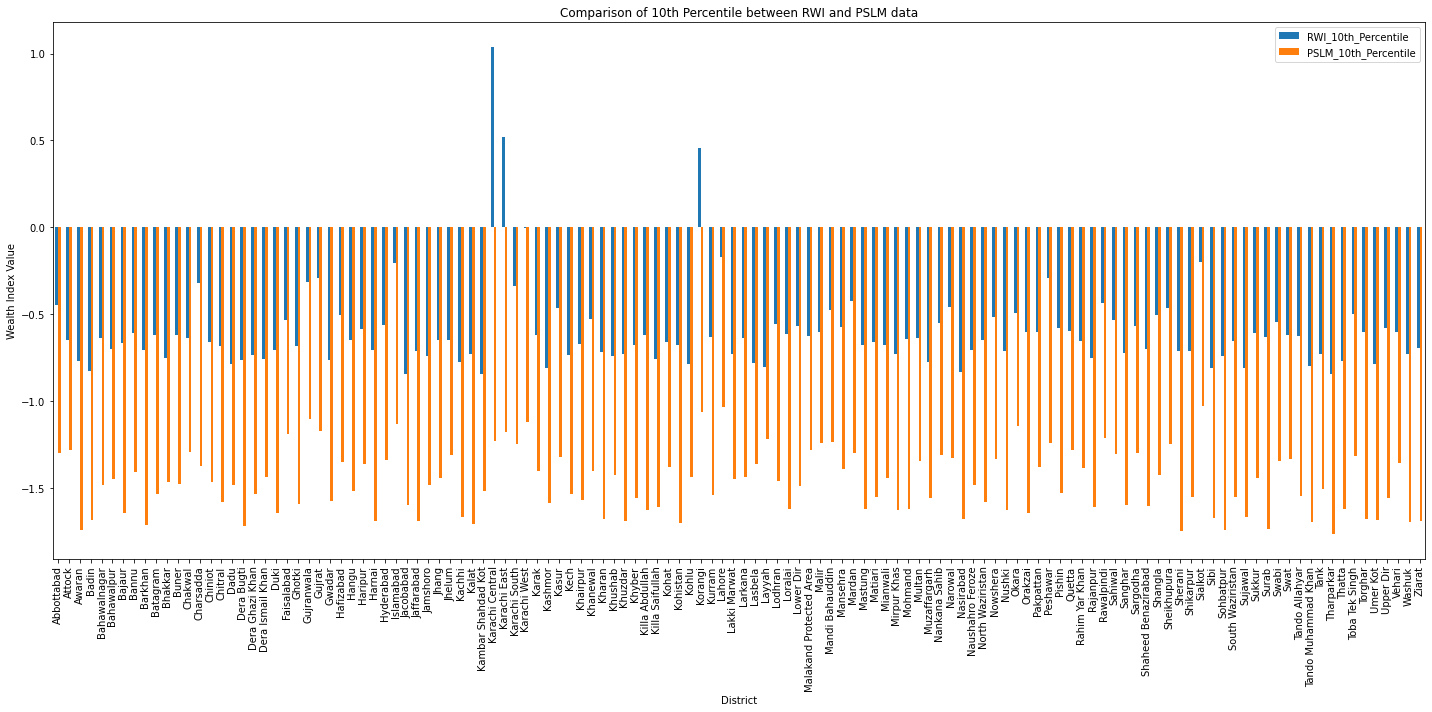

In [46]:
merged_percentiles.set_index('ADM2_EN').plot(kind='bar', figsize=(20,10))
plt.title('Comparison of 10th Percentile between RWI and PSLM data')
plt.ylabel('Wealth Index Value')
plt.xlabel('District')
plt.tight_layout()

#plt.savefig(abspath_curr + '/data/bar.png')

plt.show()


In [47]:

# Correlation Analysis
spearman_corr, spearman_pvalue = spearmanr(merged_percentiles['RWI_10th_Percentile'], merged_percentiles['PSLM_10th_Percentile'])
pearson_corr, pearson_pvalue = pearsonr(merged_percentiles['RWI_10th_Percentile'], merged_percentiles['PSLM_10th_Percentile'])

print(f"Spearman Correlation: {spearman_corr}, P-value: {spearman_pvalue}")
print(f"Pearson Correlation: {pearson_corr}, P-value: {pearson_pvalue}")



Spearman Correlation: 0.7113402835030394, P-value: 1.0227543355154879e-20
Pearson Correlation: 0.6272375889139024, P-value: 3.89501643824093e-15


          ADM2_EN  RWI_Mean  RWI_Median      District  PSLM_Mean  PSLM_Median
0      Abbottabad  0.029460     -0.0350    Abbottabad  -1.296573    -1.296573
1          Attock -0.227059     -0.2965        Attock  -1.279513    -1.279513
2          Awaran -0.425661     -0.4445        Awaran  -1.742824    -1.742824
3           Badin -0.493108     -0.5100         Badin  -1.682946    -1.682946
4    Bahawalnagar -0.234459     -0.2635  Bahawalnagar  -1.481182    -1.481182
..            ...       ...         ...           ...        ...          ...
121      Umer Kot -0.413088     -0.4495      Umer Kot  -1.686918    -1.686918
122     Upper Dir -0.225850     -0.2750     Upper Dir  -1.558077    -1.558077
123        Vehari -0.195116     -0.2270        Vehari  -1.357235    -1.357235
124        Washuk -0.430951     -0.4480        Washuk  -1.696828    -1.696828
125        Ziarat -0.370445     -0.3900        Ziarat  -1.691330    -1.691330

[126 rows x 6 columns]


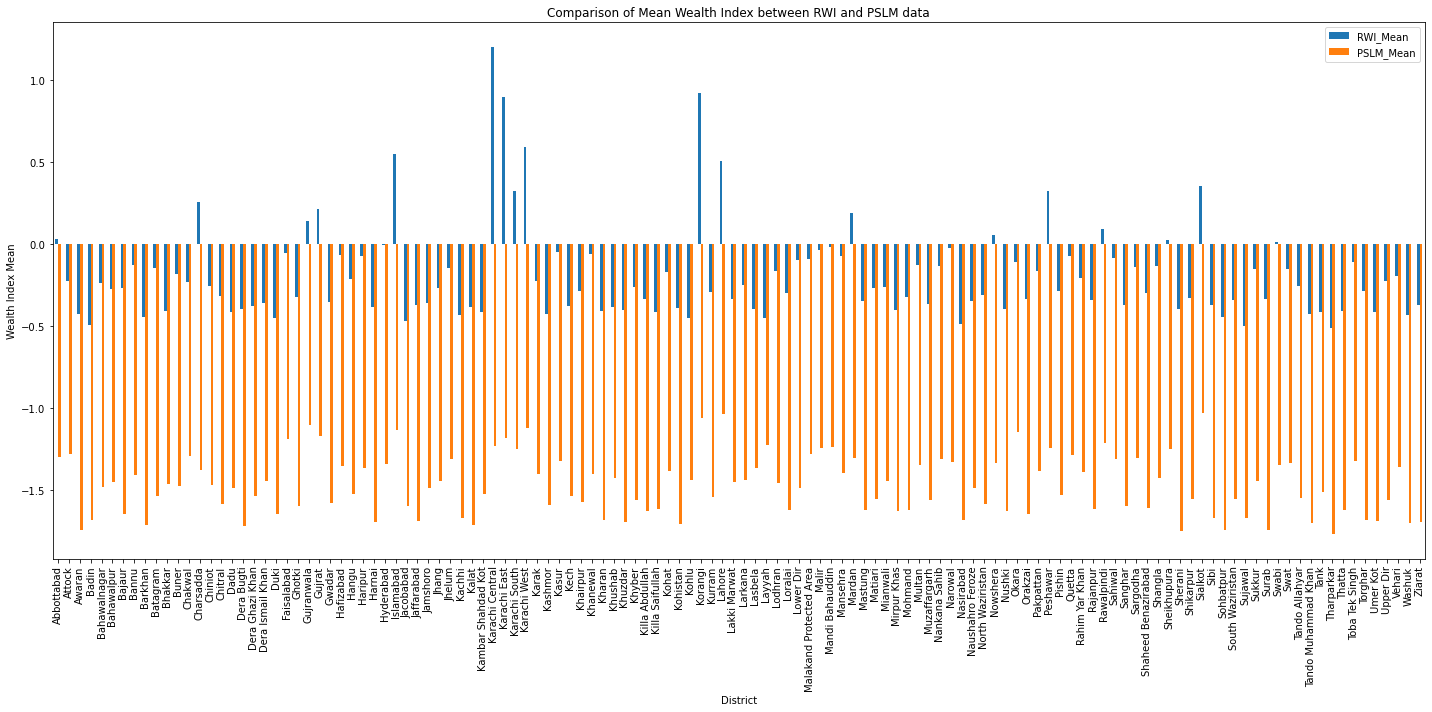

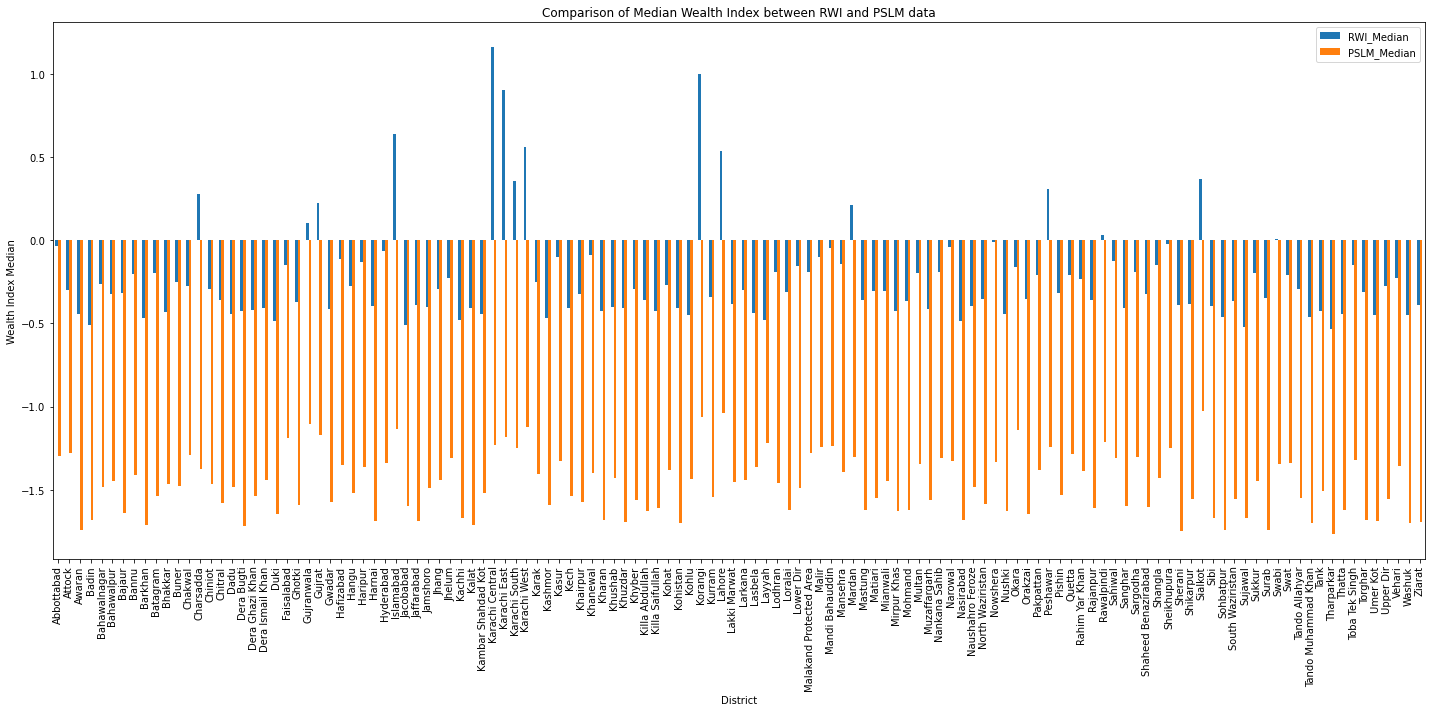

In [48]:
# Calculate additional descriptive statistics for both RWI and PSLM data
rw_stats = filtered_rwi_district_data.groupby('ADM2_EN')['rwi'].agg(['mean', 'median']).reset_index()
rw_stats.rename(columns={
    'mean': 'RWI_Mean',
    'median': 'RWI_Median',
   
}, inplace=True)

pslm_stats = pslm_district_wealth.groupby('District')['Wealth_Index1'].agg(['mean', 'median']).reset_index()
pslm_stats.rename(columns={
    'mean': 'PSLM_Mean',
    'median': 'PSLM_Median',
    
}, inplace=True)

# Merge the descriptive statistics
merged_stats = rw_stats.merge(pslm_stats, left_on='ADM2_EN', right_on='District', how='inner')

# Now let's print the merged descriptive statistics for comparison
print(merged_stats)


# Mean Comparison
merged_stats.set_index('ADM2_EN')[['RWI_Mean', 'PSLM_Mean']].plot(kind='bar', figsize=(20, 10))
plt.title('Comparison of Mean Wealth Index between RWI and PSLM data')
plt.ylabel('Wealth Index Mean')
plt.xlabel('District')
plt.tight_layout()
plt.show()

# Median Comparison
merged_stats.set_index('ADM2_EN')[['RWI_Median', 'PSLM_Median']].plot(kind='bar', figsize=(20, 10))
plt.title('Comparison of Median Wealth Index between RWI and PSLM data')
plt.ylabel('Wealth Index Median')
plt.xlabel('District')
plt.tight_layout()
plt.show()


In [49]:
#!pip install rasterio

In [50]:

urban_data_cc = rasterio.open('/Users/kismatkhatri/Documents/Capstone project/urban data/pak1k_gpod10b3000_cc.tif')

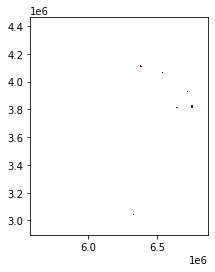

<AxesSubplot:>

In [51]:
show(urban_data_cc)

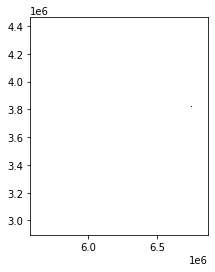

<AxesSubplot:>

In [52]:
urban_data_co = rasterio.open('/Users/kismatkhatri/Documents/Capstone project/urban data/pak1k_gpod10b3000_co.tif')
show(urban_data_co)

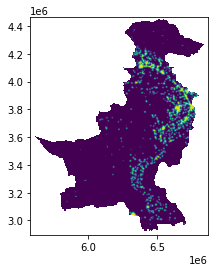

<AxesSubplot:>

In [53]:
urban_data_ct = rasterio.open('/Users/kismatkhatri/Documents/Capstone project/urban data/pak1k_gpod10b3000_ct.tif')
show(urban_data_ct)

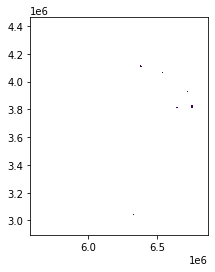

<AxesSubplot:>

In [54]:
urban_data_ur = rasterio.open('/Users/kismatkhatri/Documents/Capstone project/urban data/pak1k_gpod10b3000_ur.tif')
show(urban_data_ur)

In [56]:
# Load the shapefile
districts_gdf = gpd.read_file('/Users/kismatkhatri/Documents/Capstone project/shapefile/pak_admbnda_adm2_wfp_20220909.shp')



# Ensure that the district names match by converting them to a common format (e.g., all uppercase)
districts_gdf['ADM2_EN'] = districts_gdf['ADM2_EN'].str.upper()  # Convert to uppercase
pslm_district_wealth['District'] = pslm_district_wealth['District'].str.upper()  # Convert to uppercase

# Merge the wealth index data into the GeoDataFrame based on the district names
merged_data = districts_gdf.merge(pslm_district_wealth, left_on='ADM2_EN', right_on='District')


In [57]:
print(districts_gdf.crs)
print(urban_data_cc.crs)


None
ESRI:54009


In [58]:
# Print the bounds of the raster
print(urban_data_cc.bounds)
# Print the total bounds of the shapefile
print(districts_gdf.total_bounds)

BoundingBox(left=5585000.0, bottom=2897000.0, right=6865000.0, top=4462000.0)
[60.8785974  23.69468308 77.83396709 37.0894239 ]


In [59]:
# Assign WGS 84 CRS to shapefile
districts_gdf.crs = 'EPSG:4326'

# Reproject the shapefile to match the raster CRS
districts_gdf = districts_gdf.to_crs(urban_data_cc.crs)

# Check the total bounds of the shapefile after reprojection
print(districts_gdf.total_bounds)

[5586224.36270848 2897564.16251508 6866312.88045016 4461543.82427139]


In [60]:
def classify_urbanization(polygon, raster_dataset):
    try:
        # Mask the raster with the polygon to get the pixel values within the polygon
        masked, transform = rasterio.mask.mask(raster_dataset, [polygon], crop=True, nodata=np.nan)
        # Calculate the mean of the pixel values, ignoring NaNs
        mean_value = np.nanmean(masked)
        # Define your classification rule based on the mean value
        some_threshold = 0.5  # Replace this with your actual threshold value
        return 'Urban' if mean_value > some_threshold else 'Rural'
    except ValueError:
        # Handle the case where the polygon does not overlap the raster
        return 'No overlap'

In [105]:
# Apply the modified classify_urbanization function
merged_data['urbanization'] = merged_data.apply(
    lambda row: classify_urbanization(row.geometry, urban_data_cc),
    axis=1
)

# Aggregate wealth index by district and urbanization level
wealth_by_urbanization = merged_data.groupby(['ADM2_EN', 'urbanization'])['Wealth_Index1'].mean().reset_index()

TypeError: 'DatasetReader' object is not iterable

In [106]:
# Load the RWI data
rwi_df = pd.read_csv("/Users/kismatkhatri/Documents/Capstone project/RWI.csv")

# Assuming the RWI data contains coordinates, convert it into a GeoDataFrame
geometry = [Point(xy) for xy in zip(rwi_df.longitude, rwi_df.latitude)]
rwi_gdf = gpd.GeoDataFrame(rwi_df, crs="EPSG:4326", geometry=geometry)

# Load the urbanization raster files
core_raster = rasterio.open('/Users/kismatkhatri/Documents/Capstone project/urban data/pak1k_gpod10b3000_cc.tif')
city_center_raster = rasterio.open('/Users/kismatkhatri/Documents/Capstone project/urban data/pak1k_gpod10b3000_co.tif')
city_raster = rasterio.open('/Users/kismatkhatri/Documents/Capstone project/urban data/pak1k_gpod10b3000_ct.tif')
urban_areas_raster = rasterio.open('/Users/kismatkhatri/Documents/Capstone project/urban data/pak1k_gpod10b3000_ur.tif')

def classify_urbanization(point, rasters):
    urban_classifications = [list(raster.sample([(point.x, point.y)]))[0] for raster in rasters]
    
    # Check for non-zero values in the order of priority: Core, City Center, City, Urban Area
    if urban_classifications[0] > 0:
        return 'Core'
    elif urban_classifications[1] > 0:
        return 'City Center'
    elif urban_classifications[2] > 0:
        return 'City'
    elif urban_classifications[3] > 0:
        return 'Urban Area'
    else:
        return 'Rural'

# Apply the updated classification function
rwi_gdf['urban_classification'] = rwi_gdf['geometry'].apply(lambda point: classify_urbanization(point, rasters))


# From here, you would continue with the analysis as needed, such as computing the distribution of wealth within these urban classifications, comparing it at district levels, and simulating targeting for social programs.


In [107]:
# Function to read and display unique values in the raster
def raster_unique_values(raster):
    array = raster.read(1)  # Read the first band
    unique_values = np.unique(array)
    return unique_values

# Display unique values for each raster
for raster, classification in zip(rasters, ['Core', 'City Center', 'City', 'Urban Area']):
    print(f"{classification} unique values:", raster_unique_values(raster))


Core unique values: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  15.  16.
  17.  19.  22.  24.  25.  27.  28.  30.  33.  34.  35.  37.  38.  40.
  44.  45.  51.  55.  61.  64.  65.  66.  67.  69.  70.  75.  77.  80.
  84.  86.  89.  92. 100. 102. 107. 112. 113. 116. 117. 118. 119. 126.
 130. 133. 134. 135. 142. 145. 146. 153. 154. 162. 163. 173. 179. 185.
 205. 223. 320.]
City Center unique values: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102.]
City unique values: [-1.0000000e+00  0.0000000e+00  6.064

In [108]:
# Sample a few points to see what raster values they return
sample_points = [(point.x, point.y) for point in rwi_gdf['geometry'].head()]

for raster in rasters:
    print(list(raster.sample(sample_points)))


[array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32)]
[array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32)]
[array([-1.], dtype=float32), array([-1.], dtype=float32), array([-1.], dtype=float32), array([-1.], dtype=float32), array([-1.], dtype=float32)]
[array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32)]


In [109]:
# Check unique urban classifications
print(rwi_gdf['urban_classification'].unique())

# Verify the first few classifications to ensure they are as expected
print(rwi_gdf['urban_classification'].head())


['Rural']
0    Rural
1    Rural
2    Rural
3    Rural
4    Rural
Name: urban_classification, dtype: object


/Users/kismatkhatri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


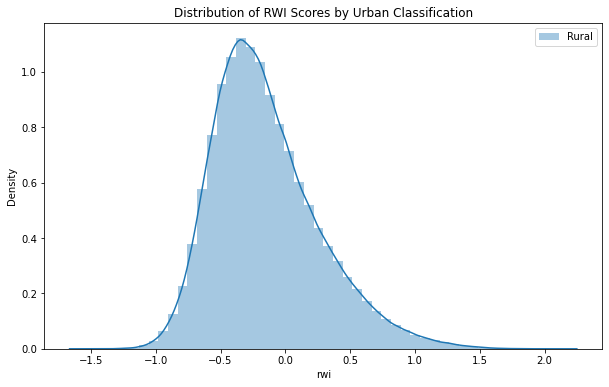

In [110]:
# Calculate statistical summaries for each urban classification
summary_stats = rwi_gdf.groupby('urban_classification')['rwi'].describe()

# Create histograms or density plots
plt.figure(figsize=(10, 6))
for classification in rwi_gdf['urban_classification'].unique():
    subset = rwi_gdf[rwi_gdf['urban_classification'] == classification]
    sns.distplot(subset['rwi'], label=classification)
plt.title('Distribution of RWI Scores by Urban Classification')
plt.legend()
plt.show()


In [123]:

PAK_raster = rasterio.open('/Users/kismatkhatri/Downloads/pak_pd_2020_1km.tif')

In [124]:
import math

# Function to convert latitude and longitude to Bing Maps Quadkey
def lat_lon_to_quadkey(lat, lon, level):
    tile_size = 256

    # Clip latitude and longitude to max values
    lat = max(min(lat, 85.0511287798), -85.0511287798)
    lon = max(min(lon, 180), -180)

    # Convert latitude and longitude to pixel coordinates in a level zoom of the Earth
    x = (lon + 180) / 360
    sin_lat = math.sin(lat * math.pi / 180)
    y = 0.5 - math.log((1 + sin_lat) / (1 - sin_lat)) / (4 * math.pi)

    # Convert Earth coordinates to pixel coordinates
    map_size = tile_size << level
    pixel_x = int(clip(x * map_size + 0.5, 0, map_size - 1))
    pixel_y = int(clip(y * map_size + 0.5, 0, map_size - 1))

    # Convert pixel coordinates to tile coordinates
    tile_x = int(math.floor(pixel_x / tile_size))
    tile_y = int(math.floor(pixel_y / tile_size))

    # Convert tile coordinates to a quadkey
    quadkey = ""
    for i in range(level, 0, -1):
        digit = 0
        mask = 1 << (i - 1)
        if (tile_x & mask) != 0:
            digit += 1
        if (tile_y & mask) != 0:
            digit += 2
        quadkey += str(digit)

    return quadkey

# Function to clip a number to the specified minimum and maximum values
def clip(n, min_value, max_value):
    return min(max(n, min_value), max_value)

# Test the function with an example coordinate
test_quadkey = lat_lon_to_quadkey(45.0, -122.0, 14)
test_quadkey


'02123201001313'

In [125]:
rwi_df['quadkey'] = rwi_df.apply(lambda row: lat_lon_to_quadkey(row['latitude'], row['longitude'], 14), axis=1)

# Check the first few rows to ensure the quadkeys have been added correctly
rwi_df.head()

,latitude,longitude,rwi,error,quadkey,population_density
0,33.897776,70.037842,-0.074,0.624,12310221130231,NaN
1,31.118794,66.807861,-0.569,0.368,12303111302200,NaN
2,32.648625,73.245850,-0.193,0.498,12310322022121,NaN
3,35.182788,72.894287,-0.178,0.355,12310213112323,NaN
4,25.948166,69.268799,-0.530,0.450,12312201232000,NaN


In [126]:
# Convert the raster data to points and calculate the quadkeys
with PAK_raster as src:
    # Read the raster data
    pop_data = src.read(1)
    # Mask for valid data (assuming no data values are represented as such)
    mask = pop_data > 0  # Replace with the appropriate condition for valid data
    rows, cols = np.where(mask)
    # Convert row, col indices to coordinates
    coords = [src.xy(row, col) for row, col in zip(rows, cols)]
    # Convert the coordinates to quadkeys
    quadkeys = [lat_lon_to_quadkey(lat, lon, 14) for lon, lat in coords]
    # Extract the population values for valid data points
    population = pop_data[mask]
    # Create a DataFrame from the quadkeys and population
    pop_quadkey_df = pd.DataFrame({
        'quadkey': quadkeys,
        'population': population
    })

# Aggregate the population by quadkeys to get the sum of the population per level 14 tile
pop_quadkey_agg_df = pop_quadkey_df.groupby('quadkey')['population'].sum().reset_index()

# Join the aggregated population data with the RWI data based on the quadkey
rwi_pop_joined_df = pd.merge(rwi_df, pop_quadkey_agg_df, on='quadkey', how='left')

# Save the joined DataFrame to a new CSV file
rwi_pop_joined_df.to_csv("/Users/kismatkhatri/Documents/Capstone project/joined_RWI_population.csv", index=False)

In [127]:
rwi_pop_joined_df.head()

,latitude,longitude,rwi,error,quadkey,population_density,population
0,33.897776,70.037842,-0.074,0.624,12310221130231,NaN,3119.037109
1,31.118794,66.807861,-0.569,0.368,12303111302200,NaN,1192.453247
2,32.648625,73.245850,-0.193,0.498,12310322022121,NaN,4926.342285
3,35.182788,72.894287,-0.178,0.355,12310213112323,NaN,1739.792480
4,25.948166,69.268799,-0.530,0.450,12312201232000,NaN,1315.402466


In [128]:
# Define the area of each quadkey in square meters (5.76 square kilometers)
quadkey_area_sqm = 5.76e6  # 5.76 square kilometers in square meters

# Calculate the population density for each quadkey
rwi_pop_joined_df['pop_density'] = rwi_pop_joined_df['population'] / quadkey_area_sqm

# Now you can save this DataFrame or continue processing as needed
rwi_pop_joined_df.to_csv("/Users/kismatkhatri/Documents/Capstone project/joined_RWI_population_density.csv", index=False)


In [129]:
rwi_pop_joined_df.head()

,latitude,longitude,rwi,error,quadkey,population_density,population,pop_density
0,33.897776,70.037842,-0.074,0.624,12310221130231,NaN,3119.037109,0.000541
1,31.118794,66.807861,-0.569,0.368,12303111302200,NaN,1192.453247,0.000207
2,32.648625,73.245850,-0.193,0.498,12310322022121,NaN,4926.342285,0.000855
3,35.182788,72.894287,-0.178,0.355,12310213112323,NaN,1739.792480,0.000302
4,25.948166,69.268799,-0.530,0.450,12312201232000,NaN,1315.402466,0.000228


In [130]:
# Calculate the weighted RWI value
rwi_pop_joined_df['rwi_weight'] = rwi_pop_joined_df['rwi'] * rwi_pop_joined_df['pop_density']

In [131]:
rwi_pop_joined_df.head()

,latitude,longitude,rwi,error,quadkey,population_density,population,pop_density,rwi_weight
0,33.897776,70.037842,-0.074,0.624,12310221130231,NaN,3119.037109,0.000541,-0.000040
1,31.118794,66.807861,-0.569,0.368,12303111302200,NaN,1192.453247,0.000207,-0.000118
2,32.648625,73.245850,-0.193,0.498,12310322022121,NaN,4926.342285,0.000855,-0.000165
3,35.182788,72.894287,-0.178,0.355,12310213112323,NaN,1739.792480,0.000302,-0.000054
4,25.948166,69.268799,-0.530,0.450,12312201232000,NaN,1315.402466,0.000228,-0.000121


In [121]:

# Function to calculate population density from a raster file
def calculate_population_density(raster_path):
    with rasterio.open(raster_path) as dataset:
        # Read the first band (assuming that's where population data is)
        band1 = dataset.read(1)
        
        # Getting the raster's transform and calculating the area of a pixel
        transform = dataset.transform
        pixel_area = transform[0] * -transform[4]  # Pixel width * pixel height (in units squared)
        
        # Assuming population count is represented directly in the raster values
        population_count = band1[band1 > 0]  # Assuming that non-positive values are no-data values
        
        # Calculate population density (population per unit squared)
        population_density = population_count / pixel_area
        
        return population_density

# Replace with the path to your raster file
raster_path = '/Users/kismatkhatri/Desktop/PK/population_0_lon_70_general-v1.5.tif'
population_density = calculate_population_density(raster_path)

# Do something with the population density
# For example, print out the average population density
print('Average population density:', np.mean(population_density))


Average population density: 166341531.7868305
